In [1]:
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
import keras_metrics
from keras import metrics
print(tf.__version__) 

2.0.0


Using TensorFlow backend.


In [3]:
def traceplot(model_hist):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(model_hist.history['loss'], color='b', label="Training loss")
    ax[0].plot(model_hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(model_hist.history['acc'], color='b', label="Training accuracy")
    ax[1].plot(model_hist.history['val_acc'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    plt.show()

In [6]:
df_train = pd.read_csv('./data/train_bin_norm_extend.csv').iloc[:,1:]
df_test=pd.read_csv('./data/test_bin_norm_extend.csv').iloc[:,1:]
df_train =df_train.dropna()
df_test = df_test.dropna()

In [7]:
len(df_train.columns)

51

In [8]:
y_train = df_train['OFFENSE_CODE_GROUP']
y_test = df_test['OFFENSE_CODE_GROUP']
X_train = df_train.drop(['OFFENSE_CODE_GROUP'],errors = 'ignore',axis =1)
X_test= df_test.drop(['OFFENSE_CODE_GROUP'],errors = 'ignore', axis =1)


In [9]:
X_train.shape

(110685, 50)

In [10]:
X_train.columns

Index(['Population density (per square mile of land area)', 'BLDG_VAL', 'LAND_VAL', 'Lat', 'Long', 'light_count', 'graffiti_count', 'HU100_RE', 'Low_to_No', 'SHOOTING_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12', 'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'HOUR_1', 'HOUR_2', 'HOUR_3', 'HOUR_4', 'HOUR_5', 'HOUR_6', 'HOUR_7', 'HOUR_8', 'HOUR_9', 'HOUR_10', 'HOUR_11', 'HOUR_12', 'HOUR_13', 'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_17', 'HOUR_18', 'HOUR_19', 'HOUR_20', 'HOUR_21', 'HOUR_22', 'HOUR_23'], dtype='object')

In [11]:
# convert class vectors to binary class matrices
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
y_train.shape

(110685, 5)

In [13]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', \
                                                         patience=30, \
                                                         verbose=0, mode='min',
                                                        restore_best_weights= True)

In [17]:
model = tf.keras.Sequential([ 
    layers.Dense(100, activation = 'relu',input_shape = (50,)),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(5, activation = 'softmax'),
    
])

In [18]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=['acc', keras_metrics.precision(), keras_metrics.recall()])
model.summary()

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 255       
Total params: 10,405
Trainable params: 10,405
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train.values, y_train, \
          epochs=200, batch_size=16, validation_split = 0.2, )

Train on 88548 samples, validate on 22137 samples
Epoch 1/200
88548/88548 [==============================] - 7s 77us/sample - loss: 0.9831 - acc: 0.4939 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 19.2324 - val_acc: 0.0300 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
88548/88548 [==============================] - 7s 76us/sample - loss: 0.9825 - acc: 0.4943 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 19.2721 - val_acc: 0.0261 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
88548/88548 [==============================] - 7s 83us/sample - loss: 0.9823 - acc: 0.4943 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 19.1263 - val_acc: 0.0318 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
88548/88548 [==============================] - 7s 81us/sample - loss: 0.9821 - acc: 0.4948 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 19.3954 - val_acc: 0.0364 - val_precision: 0.0000e+00 - val_recall: 0.000

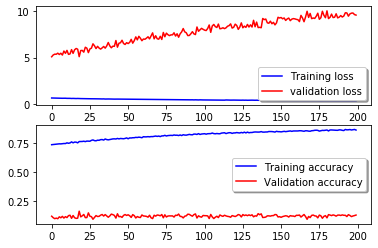

In [133]:
traceplot(history)

In [138]:
preds = model.predict_classes(X_train) 
acc_train = np.mean(preds == df_train['OFFENSE_CODE_GROUP'])
acc_train

W1209 01:25:46.577294 4616363456 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


0.7429064116632701

In [139]:
preds = model.predict_classes(X_test) 
acc_test = np.mean(preds == df_test['OFFENSE_CODE_GROUP'])
acc_test

W1209 01:25:47.465811 4616363456 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


0.3562447611064543

In [98]:
len(X_test)

19137